# Ignorar

In [ ]:
def verificar_pixels_imagem(caminho):
    # Carrega a imagem
    img = Image.open(caminho)

    # Converte a imagem para escala de cinza
    img = img.convert('L')

    # Obtém os valores de pixel como um array NumPy
    pixels = np.array(img)

    # Obtém os valores únicos de pixel e suas contagens
    valores, contagens = np.unique(pixels, return_counts=True)

    # Exibe o valor do pixel e sua frequência
    for valor, contagem in zip(valores, contagens):
        print(f'Pixel: {valor}, Frequência: {contagem}')

    # Configura a figura com duas subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

    # Plot da imagem em escala de cinza
    ax1.imshow(img, cmap='gray')
    ax1.axis('off')
    ax1.set_title('Imagem em Escala de Cinza')

    # Plot do histograma
    ax2.hist(pixels.flatten(), bins=256, color='gray')
    ax2.set_xlabel('Valor do Pixel')
    ax2.set_ylabel('Frequência')
    ax2.set_title('Histograma de Valores de Pixel')

    # Ajusta a posição da subplots para evitar sobreposição
    fig.tight_layout()

    # Exibe a figura
    plt.show()



# Passo a passo para criar uma nova imagem

Conectar ao Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importar Bibliotecas (algumas eu nem usei)

In [5]:
import os
import glob

#from skimage.transform import rotate, resize
#from skimage import io
import cv2
import tifffile as tiff
import numpy as np
import PIL.Image as Image
from matplotlib import pyplot as plt
from PIL import Image

Correção das máscaras


In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import os

# Caminhos das pastas de imagens e máscaras
pasta_imagens = '/content/drive/MyDrive/MEV - metamaficas/Projeto_Segmentação_Rocha_Máfica/Ground_truth/Dados_teste/images/'
pasta_mascaras = '/content/drive/MyDrive/MEV - metamaficas/Projeto_Segmentação_Rocha_Máfica/Ground_truth/Dados_teste/masks/'

# Obtém a lista de nomes dos arquivos de imagens na pasta
nomes_imagens = os.listdir(pasta_imagens)

# Percorre os nomes dos arquivos de imagens
for nome_imagem in nomes_imagens:
    # Caminho completo da imagem
    caminho_imagem = os.path.join(pasta_imagens, nome_imagem)

    # Caminho completo da máscara com o mesmo nome
    caminho_mascara = os.path.join(pasta_mascaras, nome_imagem)

    # Abre a imagem e a máscara usando a biblioteca PIL
    imagem = Image.open(caminho_imagem)
    mascara = Image.open(caminho_mascara)

    # Cria uma figura e os subplots para exibir a imagem e a máscara
    fig, axs = plt.subplots(1, 2, figsize=(25, 10))

    # Exibe a imagem no primeiro subplot
    axs[0].imshow(imagem, cmap='gray')
    axs[0].set_title(nome_imagem)

    # Exibe a máscara no segundo subplot
    axs[1].imshow(mascara, cmap='gray')
    axs[1].set_title(nome_imagem)

    # Remove os eixos das subplots
    for ax in axs:
        ax.axis('off')

    # Mostra a figura com as subplots
    plt.show()


FileNotFoundError: ignored

# Definição das funções

In [2]:
# Definição das funções

def processar_imagem(caminho_imagem):
    # Importar a imagem
    imagem = Image.open(caminho_imagem)

    # Converter a imagem para uma matriz numpy
    matriz = np.array(imagem)

    # Verificar se há mais de 6 classes na imagem
    valores_unicos = np.unique(matriz)
    if len(valores_unicos) > 6:
        # Perguntar qual o valor de pixel que representa o fundo
        valor_fundo = int(input("Qual o valor de pixel que representa o fundo? "))

        # Substituir os valores correspondentes na matriz pelo valor do fundo
        matriz[matriz == valor_fundo] = 0

    # Criar uma nova matriz com o mesmo shape da imagem
    nova_matriz = np.zeros_like(matriz)

    # Mapear os valores dos pixels para as classes desejadas
    classes = {
        'Titanita': 1,
        'Biotita': 2,
        'Anfibólio': 3,
        'K-feldspato': 4,
        'Plagioclásio': 5
    }

    for classe, valor in classes.items():
        # Perguntar qual o valor de pixel para a classe atual
        pixel_valor = int(input(f"Qual o valor de pixel para '{classe}'? "))

        # Substituir os valores correspondentes na nova matriz
        nova_matriz[matriz == pixel_valor] = valor

    # Criar uma nova imagem a partir da nova matriz
    nova_imagem = tiff.imwrite(caminho_imagem, nova_matriz)

    return nova_imagem


def exibir_tons_pixel(mascara):
    # Carrega a imagem
    img = Image.open(mascara)
    img = np.array(img)

    # Obtém os valores de pixel como um array NumPy
    pixels = np.array(img)

    # Obtém os tons de pixel únicos
    tons_pixel = np.unique(pixels)

    # Cria uma figura com subplots para cada tom de pixel
    fig, axs = plt.subplots(1, len(tons_pixel), figsize=(15, 3))

    # Itera sobre os tons de pixel únicos
    for i, ton in enumerate(tons_pixel):
        # Cria uma cópia da imagem original
        img_ton = img.copy()
        mineral = {0: 'fundo', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5'}
        # Exibe a imagem do tom de pixel atual
        axs[i].imshow(img_ton == i, cmap='gray')
        axs[i].axis('off')
        axs[i].set_title(f'{mineral[i]}')

    # Ajusta a posição das subplots para evitar sobreposição
    fig.tight_layout()

    # Exibe a figura
    plt.show()

def exibir_tons_pixel2(img):
    # Obtém os valores de pixel como um array NumPy
    pixels = np.array(img)

    # Obtém os tons de pixel únicos
    tons_pixel = np.unique(pixels)

    # Cria uma figura com subplots para cada tom de pixel
    fig, axs = plt.subplots(1, len(tons_pixel), figsize=(15, 3))

    # Dicionário para mapear os tons de pixel a nomes de minerais
    mineral = {0: 'fundo', 1: 'Titanita', 2: 'Biotita', 3: 'Anfibólio', 4: 'K-feldspato', 5: 'Plagioclásio'}

    # Itera sobre os tons de pixel únicos
    for i, ton in enumerate(tons_pixel):
        # Cria uma cópia da imagem original
        img_ton = img.copy()

        # Exibe a imagem do tom de pixel atual
        axs[i].imshow(np.array(img_ton) == ton, cmap='gray')
        axs[i].axis('off')
        axs[i].set_title(f'{mineral[ton]}')

    # Ajusta a posição das subplots para evitar sobreposição
    fig.tight_layout()

    # Exibe a figura
    plt.show()


# Protocolo de modificação das mascaras
Após rodar as funções as funções acima, rode o código abaixo e veja como estão as classes minerais. A ordem original é:
0 - Fundo
1 - Titanita
2 - Biotita
3 - Anfibólio
4 - K-feldspato
5 - Plagioclásio

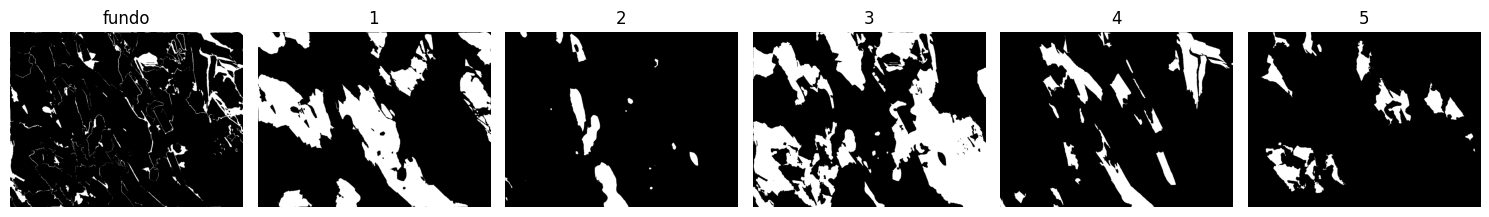

In [16]:
mascara = '/content/AT-Z-01-16.tif'
exibir_tons_pixel(mascara)

Importar e exibir a imagem original, para comparar onde deveria estar cada classe

In [ ]:
caminho_imagem = '/content/AT-Z-01-11.tif'
imagem = Image.open(caminho_imagem)
plt.imshow(imagem, cmap='gray')



---


Criar nova imagem com a ordem certa dos pixels

In [ ]:
nova_imagem = processar_imagem(mascara) # mascara ja foi criado
print(f'\nNova imagem processada:')


Qual o valor de pixel para 'Titanita'? 1
Qual o valor de pixel para 'Biotita'? 2
Qual o valor de pixel para 'Anfibólio'? 3
Qual o valor de pixel para 'K-feldspato'? 4
Qual o valor de pixel para 'Plagioclásio'? 5

Nova imagem processada:


AttributeError: ignored

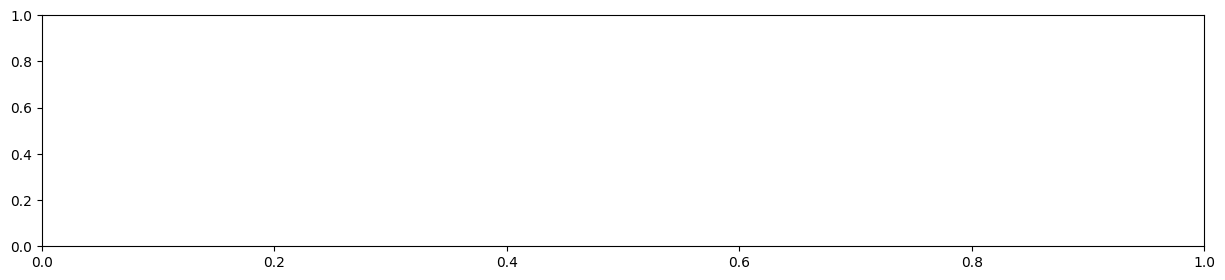

In [ ]:
exibir_tons_pixel2(nova_imagem)

In [ ]:
nova_imagem.shape

AttributeError: ignored

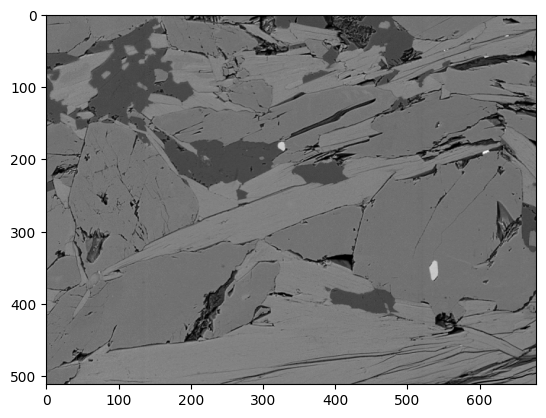

In [ ]:
# Compare com a imagem original
plt.imshow(imagem, cmap='gray')

Salve a nova máscara, com a posição padrão das classes

In [ ]:
# Extrair o nome do arquivo da imagem importada
nome_arquivo = caminho_imagem.split("/")[-1]

# Definir o caminho para salvar a nova imagem com o mesmo nome
caminho_salvar = "/content/drive/MyDrive/MEV - metamaficas/Projeto_Segmentação_Rocha_Máfica/Ground_truth/Dados_teste/masks_corrigidas/" + nome_arquivo

# Salvar a nova imagem
nova_imagem.save(caminho_salvar)

print("Nova imagem salva com sucesso!")

AttributeError: ignored